https://keras.io/api/applications/vgg/

In [ ]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Choose a Pre-Trained Model
import torchvision.models as models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File reading and saving
import os
from google.colab import drive
import pickle

# General libraries
import pandas as pd
import numpy as np
from typing import List, Tuple, Union, Dict, Optional
from contextlib import contextmanager

# Visualization
import matplotlib.pyplot as plt
import cv2 as cv

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import torch.nn.functional as F
from torch.utils.data import TensorDataset

In [ ]:
# Load the pre-trained VGG16 model
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:17<00:00, 31.6MB/s]


In [ ]:
num_classes= 12
model = models.vgg16(pretrained=True)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for param in model.parameters():
  param.requires_grad = False

In [ ]:
# Data Preprocessing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to (224, 224) for VGG-16
    transforms.ToTensor(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to (224, 224) for VGG-16
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [ ]:
class LoadDataset:
  def __init__(self, path: str):
    self.path = path

  def collect_image_files(self) -> List[str]:
    """
    Collects image files from the specified directory.

    Returns:
        List[str]: List of image file paths.
    """
    image_files = []
    for dirname, _, filenames in os.walk(self.path):
      for filename in filenames:
        image_files.append(os.path.join(dirname, filename))
    return image_files

  def show_images(self, images_list: List[str], rows: int=10, cols: int=10):
    """
    Displays a grid of images.

    Args:
        images_list (List[str]): List of image file paths.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    axes = axes.flatten()
    for i, image_path in enumerate(images_list):
      if i >= rows * cols:
        break
      try:
        img = cv.imread(image_path)
        if img is None:
          raise Exception(f"Failed to load image: {image_path}")

        axes[i].imshow(img)

      except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

    plt.tight_layout()
    plt.show()

In [ ]:
folder_a = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_a_samples"
folder_aw = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_aw_samples"
folder_aa = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_aa_samples"
folder_d = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_d_samples"
folder_dd = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_dd_samples"
folder_e = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_e_samples"
folder_ee = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_ee_samples"
folder_o = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_o_samples"
folder_oo = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_oo_samples"
folder_ow = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_ow_samples"
folder_u = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_u_samples"
folder_uw = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_uw_samples"

In [ ]:
letter_a = LoadDataset(folder_a)
images_a = letter_a.collect_image_files()
letter_aw = LoadDataset(folder_aw)
images_aw = letter_aw.collect_image_files()
letter_aa = LoadDataset(folder_aa)
images_aa = letter_aa.collect_image_files()
letter_d = LoadDataset(folder_d)
images_d = letter_d.collect_image_files()
letter_dd = LoadDataset(folder_dd)
images_dd = letter_dd.collect_image_files()
letter_e = LoadDataset(folder_e)
images_e = letter_e.collect_image_files()
letter_ee = LoadDataset(folder_ee)
images_ee = letter_ee.collect_image_files()
letter_o = LoadDataset(folder_o)
images_o = letter_o.collect_image_files()
letter_oo = LoadDataset(folder_oo)
images_oo = letter_oo.collect_image_files()
letter_ow = LoadDataset(folder_ow)
images_ow = letter_ow.collect_image_files()
letter_u = LoadDataset(folder_u)
images_u = letter_u.collect_image_files()
letter_uw = LoadDataset(folder_uw)
images_uw = letter_uw.collect_image_files()

In [ ]:
# Label data
a_labeled_images = {a_image: 'a' for a_image in images_a}
aw_labeled_images = {aw_image: 'ă' for aw_image in images_aw}
aa_labeled_images = {aa_image: 'â' for aa_image in images_aa}
d_labeled_images = {d_image: 'd' for d_image in images_d}
dd_labeled_images = {dd_image: 'đ' for dd_image in images_dd}
e_labeled_images = {e_image: 'e' for e_image in images_e}
ee_labeled_images = {ee_image: 'ê' for ee_image in images_ee}
o_labeled_images = {o_image: 'o' for o_image in images_o}
oo_labeled_images = {oo_image: 'ô' for oo_image in images_oo}
ow_labeled_images = {ow_image: 'ơ' for ow_image in images_ow}
u_labeled_images = {u_image: 'u' for u_image in images_u}
uw_labeled_images = {uw_image: 'ư' for uw_image in images_uw}

In [ ]:
all_images = {**a_labeled_images, **aw_labeled_images, **aa_labeled_images, \
              **d_labeled_images, **dd_labeled_images, \
              **e_labeled_images, **ee_labeled_images, \
              **o_labeled_images, **oo_labeled_images, **ow_labeled_images, \
              **u_labeled_images, **uw_labeled_images}

In [ ]:
# Convert data into dataframe
df = pd.DataFrame(list(all_images.items()), columns=['image_file', 'label'])
df

,image_file,label
0,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
1,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
2,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
3,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
4,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
...,...,...
1195,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1196,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1197,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1198,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư


In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize to VGG16 input size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Apply preprocessing to all images
df['processed_image'] = df['image_file'].apply(preprocess_image)

In [ ]:
df.head()

,image_file,label,processed_image
0,/content/drive/MyDrive/24-25 Academic Year/CS1...,a,"[[[[255. 255. 255.], [255. 255. 255.], [255. 2..."
1,/content/drive/MyDrive/24-25 Academic Year/CS1...,a,"[[[[255. 255. 255.], [255. 255. 255.], [255. 2..."
2,/content/drive/MyDrive/24-25 Academic Year/CS1...,a,"[[[[255. 255. 255.], [255. 255. 255.], [255. 2..."
3,/content/drive/MyDrive/24-25 Academic Year/CS1...,a,"[[[[255. 255. 255.], [255. 255. 255.], [255. 2..."
4,/content/drive/MyDrive/24-25 Academic Year/CS1...,a,"[[[[255. 255. 255.], [255. 255. 255.], [255. 2..."


In [ ]:
df['processed_image'][0].shape

(1, 224, 224, 3)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class PreprocessedImageDataset(Dataset):
    """
    Dataset class that handles both original and augmented images.
    It can apply different transforms for training and validation/test sets.
    """
    def __init__(self, images, labels, transform=None):
        self.images = images  # Expected in (N, C, H, W) format
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            # Convert tensor to PIL for transforms
            image_pil = transforms.ToPILImage()(image)
            # Apply transforms
            image = self.transform(image_pil)
        else:
            # If no transform, ensure we still have a proper tensor
            image_pil = transforms.ToPILImage()(image)
            image = transforms.ToTensor()(image_pil)

        return image, label

# Define transforms for different dataset splits
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

def create_augmented_dataset(images, labels, copies=3):
    """
    Creates multiple augmented versions of each image in the training set.
    """
    all_images = [images]
    all_labels = [labels]

    # Define augmentation transform
    augment_transform = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    print("Generating augmented images...")
    for copy in tqdm(range(copies)):
        batch_augmented = []
        for img in images:
            img_pil = transforms.ToPILImage()(img)
            aug_img = augment_transform(img_pil)
            batch_augmented.append(aug_img)

        all_images.append(torch.stack(batch_augmented))
        all_labels.append(labels)

    # Combine and shuffle all versions
    final_images = torch.cat(all_images, dim=0)
    final_labels = torch.cat(all_labels, dim=0)
    indices = torch.randperm(len(final_images))

    return final_images[indices], final_labels[indices]

# Prepare your data
X = np.stack(df['processed_image'].values).squeeze()
X = X.transpose(0, 3, 1, 2)  # Convert to (N, C, H, W) format
X = X / 255.0  # Initial normalization

# Convert labels
unique_labels = sorted(df['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
y = np.array([label_to_idx[label] for label in df['label']])

# Split data into train/val/test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

# Create augmented training set
print(f"Original training set size: {len(X_train)}")
X_train_aug, y_train_aug = create_augmented_dataset(X_train, y_train, copies=3)  # Increased to 3 copies
print(f"Augmented training set size: {len(X_train_aug)}")

# Create datasets with appropriate transforms
train_dataset = PreprocessedImageDataset(X_train_aug, y_train_aug)
val_dataset = PreprocessedImageDataset(X_val, y_val, transform=data_transforms['val'])
test_dataset = PreprocessedImageDataset(X_test, y_test, transform=data_transforms['val'])

# Create dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

# Print final dataset sizes
print(f"\nFinal dataset sizes:")
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Original training set size: 768
Generating augmented images...


100%|██████████| 3/3 [00:20<00:00,  6.71s/it]


Augmented training set size: 3072

Final dataset sizes:
Training set size: 3072
Validation set size: 192
Test set size: 240


In [ ]:
class MiniVGG(nn.Module):
    def __init__(self, num_classes=12):  # Changed to 12 classes
        super(MiniVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Linear(64 * 7 * 7, num_classes)  # Output layer now has 12 nodes

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
# Initialize model and move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MiniVGG(num_classes=12).to(device)

In [ ]:
# Compile the Model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
              ReLU-2         [-1, 16, 224, 224]               0
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
              ReLU-5         [-1, 32, 112, 112]               0
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
              ReLU-8           [-1, 64, 56, 56]               0
         MaxPool2d-9           [-1, 64, 28, 28]               0
AdaptiveAvgPool2d-10             [-1, 64, 7, 7]               0
           Linear-11                   [-1, 12]          37,644
Total params: 61,228
Trainable params: 61,228
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/ba

In [ ]:
model.train()

MiniVGG(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Linear(in_features=3136, out_features=12, bias=True)
)

In [ ]:
# Fine-tuning
import time

num_epochs = 100
train_losses = []
train_correct = 0
train_total = 0

start_train_time = time.time()
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracy = train_correct / train_total
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')
    print(f'Train Accuracy: {train_accuracy * 100}%')
end_train_time = time.time()

print(f'Finished fine-tuning with {train_accuracy * 100}% accuracy')
print(f'Total training time: {end_train_time - start_train_time} seconds')

Epoch 1/100, Loss: 0.46493390916536254
Train Accuracy: 85.80729166666666%
Epoch 2/100, Loss: 0.36420607722053927
Train Accuracy: 86.88151041666666%
Epoch 3/100, Loss: 0.29771944527359057
Train Accuracy: 87.80381944444444%
Epoch 4/100, Loss: 0.25120579769524437
Train Accuracy: 88.76953125%
Epoch 5/100, Loss: 0.21055012355403355
Train Accuracy: 89.62890625%
Epoch 6/100, Loss: 0.15150013057670245
Train Accuracy: 90.52734375%
Epoch 7/100, Loss: 0.13230944623743804
Train Accuracy: 91.23883928571429%
Epoch 8/100, Loss: 0.09830355507438071
Train Accuracy: 91.943359375%
Epoch 9/100, Loss: 0.08760038191879478
Train Accuracy: 92.47685185185185%
Epoch 10/100, Loss: 0.06489624058546421
Train Accuracy: 93.02408854166667%
Epoch 11/100, Loss: 0.0496408292989751
Train Accuracy: 93.51029829545455%
Epoch 12/100, Loss: 0.051684660077929344
Train Accuracy: 93.91004774305556%
Epoch 13/100, Loss: 0.03214053963589928
Train Accuracy: 94.30088141025641%
Epoch 14/100, Loss: 0.03890918257942152
Train Accuracy: 9

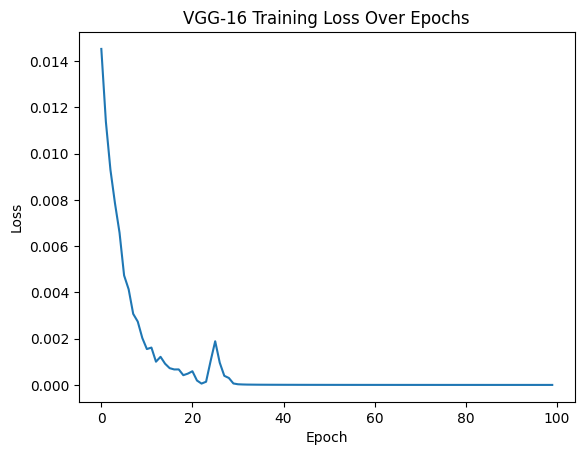

In [ ]:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGG-16 Training Loss Over Epochs')
plt.show()

Evaluating model on test set...

Test Set Performance:
Loss: 1.3373
Accuracy: 0.9625
F1-Score (Weighted): 0.9622

Per-class F1 Scores:
Class 0: 0.9714
Class 1: 0.9615
Class 2: 0.9412
Class 3: 0.9714
Class 4: 0.9143
Class 5: 0.9787
Class 6: 1.0000
Class 7: 0.9767
Class 8: 1.0000
Class 9: 0.9714
Class 10: 0.9565
Class 11: 0.8824

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      1.00      0.96        25
           2       0.94      0.94      0.94        17
           3       0.94      1.00      0.97        17
           4       0.84      1.00      0.91        16
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        21
           7       1.00      0.95      0.98        22
           8       1.00      1.00      1.00        21
           9       1.00      0.94      0.97        18
          10       0.96      0.96      0.96        2

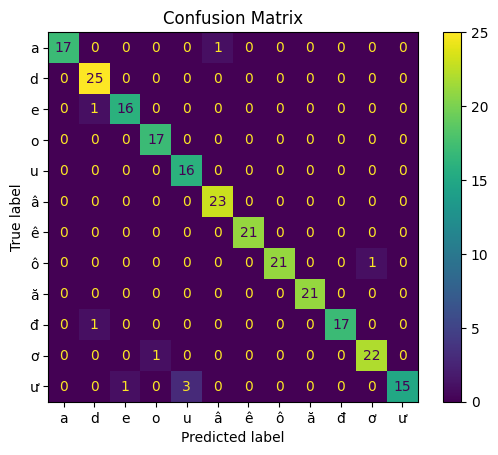


Total testing time: 6.07 seconds


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import time

def evaluate_model(model, test_loader, criterion, device='cuda'):
    """
    Evaluates the model on the test set and returns various performance metrics.

    Args:
        model: The trained PyTorch model
        test_loader: DataLoader containing the test dataset
        criterion: Loss function
        device: Device to run the evaluation on

    Returns:
        dict: Dictionary containing various performance metrics
    """
    model.eval()
    all_predictions = []
    all_labels = []
    total_loss = 0.0

    # Perform testing in a single pass
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)  # Multiply by batch size

            # Get predictions
            _, predicted = torch.max(outputs.data, 1)

            # Store predictions and labels
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_loss = total_loss / len(test_loader.dataset)
    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    # Calculate per-class metrics
    class_f1 = f1_score(all_labels, all_predictions, average=None)
    confusion_mat = confusion_matrix(all_labels, all_predictions)

    # Create classification report
    class_report = classification_report(all_labels, all_predictions)

    return {
        'test_loss': test_loss,
        'accuracy': accuracy,
        'f1_score': f1,
        'per_class_f1': class_f1,
        'confusion_matrix': confusion_mat,
        'classification_report': class_report
    }

# After training is complete, evaluate the model
start_test_time = time.time()
print("Evaluating model on test set...")

# Move model to appropriate device if not already done
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Get evaluation metrics
metrics = evaluate_model(model, test_loader, criterion, device)

# Print results
print("\nTest Set Performance:")
print(f"Loss: {metrics['test_loss']:.4f}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"F1-Score (Weighted): {metrics['f1_score']:.4f}")

print("\nPer-class F1 Scores:")
for i, f1 in enumerate(metrics['per_class_f1']):
    print(f"Class {i}: {f1:.4f}")

print("\nClassification Report:")
print(metrics['classification_report'])

cm = metrics['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

end_test_time = time.time()
print(f'\nTotal testing time: {end_test_time - start_test_time:.2f} seconds')